In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import sqlite3
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [11]:
database = 'cad.db'
conn = sqlite3.connect(database)

In [12]:
cur = conn.cursor()

#check_table_cols = "SELECT * FROM Health_Indicators"
#cur.execute(check_table_cols)
#col_name_list = [tuple[0] for tuple in cur.description]
#col_name_list

cur.execute("SELECT name FROM sqlite_master WHERE type='table' ORDER BY name;")
available_table=(cur.fetchall())
available_table

[('Avg_BMI',), ('Health_Indicators',)]

In [13]:
check_table_cols = "SELECT * FROM Health_Indicators"
cur.execute(check_table_cols)
col_name_list = [tuple[0] for tuple in cur.description]
col_name_list

['Target',
 'High_BP',
 'High_chol',
 'Chol_check',
 'BMI',
 'Smoker',
 'Stroke',
 'Diabetes',
 'Physical_activity',
 'Fruits',
 'Veggies',
 'Hvy_alcohol_consump',
 'Any_healthcare',
 'No_doc_cost',
 'Gen_health',
 'Mental_health',
 'Physical_health',
 'Diff_walk',
 'Sex',
 'Age_level',
 'Education_level',
 'Income_level']

In [14]:
check_table_cols = "SELECT * FROM Avg_BMI"
cur.execute(check_table_cols)
col_name_list = [tuple[0] for tuple in cur.description]
col_name_list

['age_level', 'Q1_bmi', 'median_bmi', 'Q3_bmi', 'avg_bmi']

In [15]:
#Health Indicators Table
df1 = pd.read_sql("select * from Health_Indicators", con=conn )

In [16]:
df1.head()

,Target,High_BP,High_chol,Chol_check,BMI,Smoker,Stroke,Diabetes,Physical_activity,Fruits,...,Any_healthcare,No_doc_cost,Gen_health,Mental_health,Physical_health,Diff_walk,Sex,Age_level,Education_level,Income_level
0,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
2,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
3,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
4,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0


In [17]:
df2 = pd.read_sql("select * from Avg_BMI", con=conn )

In [18]:
df2.head()

,age_level,Q1_bmi,median_bmi,Q3_bmi,avg_bmi
0,1,21.9,25.5,30.7,27.1
1,2,22.5,26.4,31.7,27.9
2,3,24.4,28.1,33.5,29.6
3,4,24.7,29.0,34.3,30.2
4,5,24.6,29.1,33.4,30.1


In [27]:
# Select Left Join Avg_BMI DATA Using Age. 
df = pd.concat([df2, df1], axis=1)
concatenated.head()

,age_level,Q1_bmi,median_bmi,Q3_bmi,avg_bmi,Target,High_BP,High_chol,Chol_check,BMI,...,Any_healthcare,No_doc_cost,Gen_health,Mental_health,Physical_health,Diff_walk,Sex,Age_level,Education_level,Income_level
0,1.0,21.9,25.5,30.7,27.1,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1,2.0,22.5,26.4,31.7,27.9,0.0,1.0,1.0,1.0,40.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
2,3.0,24.4,28.1,33.5,29.6,0.0,0.0,0.0,0.0,25.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
3,4.0,24.7,29.0,34.3,30.2,0.0,1.0,1.0,1.0,28.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
4,5.0,24.6,29.1,33.4,30.1,0.0,1.0,0.0,1.0,27.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0


In [28]:
cur.execute("SELECT name FROM sqlite_master WHERE type='table' ORDER BY name;")
available_table=(cur.fetchall())
available_table

[('Avg_BMI',), ('Health_Indicators',)]

In [29]:
df.head()

,age_level,Q1_bmi,median_bmi,Q3_bmi,avg_bmi,Target,High_BP,High_chol,Chol_check,BMI,...,Any_healthcare,No_doc_cost,Gen_health,Mental_health,Physical_health,Diff_walk,Sex,Age_level,Education_level,Income_level
0,1.0,21.9,25.5,30.7,27.1,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1,2.0,22.5,26.4,31.7,27.9,0.0,1.0,1.0,1.0,40.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
2,3.0,24.4,28.1,33.5,29.6,0.0,0.0,0.0,0.0,25.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
3,4.0,24.7,29.0,34.3,30.2,0.0,1.0,1.0,1.0,28.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
4,5.0,24.6,29.1,33.4,30.1,0.0,1.0,0.0,1.0,27.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0


In [30]:
#Data analysis
df.shape

(253681, 27)

In [31]:
df.keys()

Index(['age_level', 'Q1_bmi', 'median_bmi', 'Q3_bmi', 'avg_bmi', 'Target',
       'High_BP', 'High_chol', 'Chol_check', 'BMI', 'Smoker', 'Stroke',
       'Diabetes', 'Physical_activity', 'Fruits', 'Veggies',
       'Hvy_alcohol_consump', 'Any_healthcare', 'No_doc_cost', 'Gen_health',
       'Mental_health', 'Physical_health', 'Diff_walk', 'Sex', 'Age_level',
       'Education_level', 'Income_level'],
      dtype='object')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253681 entries, 0 to 253680
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age_level            13 non-null      float64
 1   Q1_bmi               13 non-null      float64
 2   median_bmi           13 non-null      float64
 3   Q3_bmi               13 non-null      float64
 4   avg_bmi              13 non-null      float64
 5   Target               253681 non-null  object 
 6   High_BP              253681 non-null  object 
 7   High_chol            253681 non-null  object 
 8   Chol_check           253681 non-null  object 
 9   BMI                  253681 non-null  object 
 10  Smoker               253681 non-null  object 
 11  Stroke               253681 non-null  object 
 12  Diabetes             253681 non-null  object 
 13  Physical_activity    253681 non-null  object 
 14  Fruits               253681 non-null  object 
 15  Veggies          

In [33]:
df.describe()

,age_level,Q1_bmi,median_bmi,Q3_bmi,avg_bmi
count,13.00000,13.000000,13.000000,13.000000,13.000000
mean,7.00000,24.384615,28.192308,32.830769,29.307692
std,3.89444,1.101398,1.162943,1.212700,1.097316
min,1.00000,21.900000,25.500000,30.700000,27.100000
25%,4.00000,24.100000,27.500000,31.700000,28.100000
50%,7.00000,24.600000,28.600000,33.100000,29.800000
75%,10.00000,25.000000,29.000000,33.600000,30.100000
max,13.00000,25.700000,29.200000,34.300000,30.500000


In [34]:
#Checking for missing values
df.isnull().sum()

age_level              253668
Q1_bmi                 253668
median_bmi             253668
Q3_bmi                 253668
avg_bmi                253668
Target                      0
High_BP                     0
High_chol                   0
Chol_check                  0
BMI                         0
Smoker                      0
Stroke                      0
Diabetes                    0
Physical_activity           0
Fruits                      0
Veggies                     0
Hvy_alcohol_consump         0
Any_healthcare              0
No_doc_cost                 0
Gen_health                  0
Mental_health               0
Physical_health             0
Diff_walk                   0
Sex                         0
Age_level                   0
Education_level             0
Income_level                0
dtype: int64

In [35]:
# Here we are renaming the Column that states whether a patient has or has not been diagnoesed with Heart Disease or a Heart Attack as Target. 
df = df.rename(columns = {"HeartDiseaseorAttack":"target"})
df.head()

,age_level,Q1_bmi,median_bmi,Q3_bmi,avg_bmi,Target,High_BP,High_chol,Chol_check,BMI,...,Any_healthcare,No_doc_cost,Gen_health,Mental_health,Physical_health,Diff_walk,Sex,Age_level,Education_level,Income_level
0,1.0,21.9,25.5,30.7,27.1,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1,2.0,22.5,26.4,31.7,27.9,0.0,1.0,1.0,1.0,40.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
2,3.0,24.4,28.1,33.5,29.6,0.0,0.0,0.0,0.0,25.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
3,4.0,24.7,29.0,34.3,30.2,0.0,1.0,1.0,1.0,28.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
4,5.0,24.6,29.1,33.4,30.1,0.0,1.0,0.0,1.0,27.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0


In [36]:
df.dtypes

age_level              float64
Q1_bmi                 float64
median_bmi             float64
Q3_bmi                 float64
avg_bmi                float64
Target                  object
High_BP                 object
High_chol               object
Chol_check              object
BMI                     object
Smoker                  object
Stroke                  object
Diabetes                object
Physical_activity       object
Fruits                  object
Veggies                 object
Hvy_alcohol_consump     object
Any_healthcare          object
No_doc_cost             object
Gen_health              object
Mental_health           object
Physical_health         object
Diff_walk               object
Sex                     object
Age_level               object
Education_level         object
Income_level            object
dtype: object

<Figure size 3600x3600 with 0 Axes>

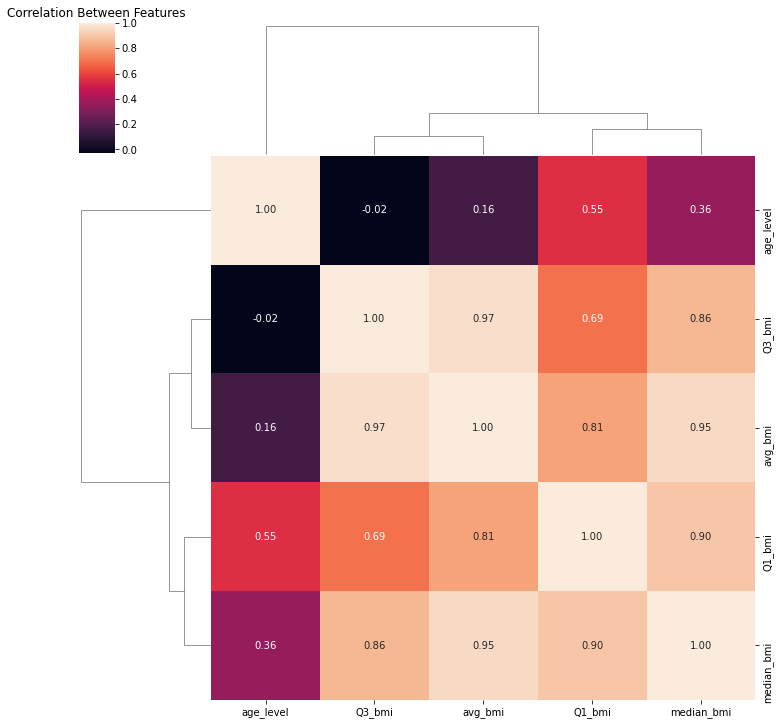

In [37]:
# Correlation
corr_matrix = df.corr()
plt.figure(figsize=(50,50))
sns.clustermap(corr_matrix, annot = True, fmt = ".2f")
plt.title("Correlation Between Features")
plt.show()

In [39]:
# How many had heart disease and not.
df['Target'].value_counts()

0.0                     229787
1.0                      23893
HeartDiseaseorAttack         1
Name: Target, dtype: int64

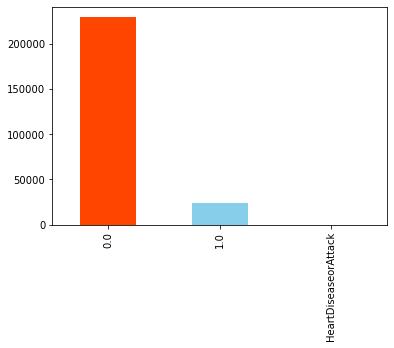

In [41]:
df['Target'].value_counts().plot(kind='bar',
                                 color=['orangered', 'skyblue']);

In [42]:
df.Sex.value_counts()

0.0    141974
1.0    111706
Sex         1
Name: Sex, dtype: int64

In [44]:
# Compare sex vs target column
pd.crosstab(df['Target'], df['Sex'])

Sex,0.0,1.0,Sex
Target,,,
0.0,131769,98018,0
1.0,10205,13688,0
HeartDiseaseorAttack,0,0,1


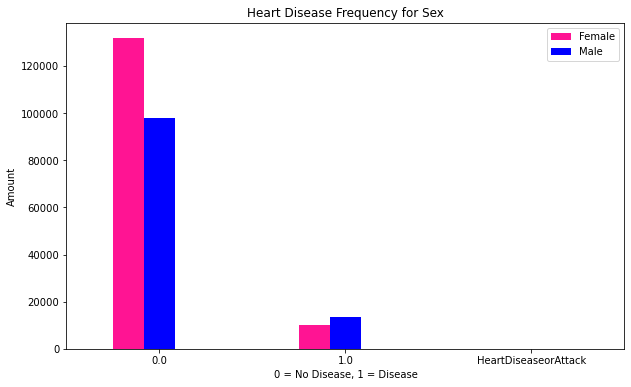

In [46]:
pd.crosstab(df['Target'], df['Sex']).plot(kind='bar',
                                          figsize=(10,6),
                                          color=['deeppink', 'blue']);
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

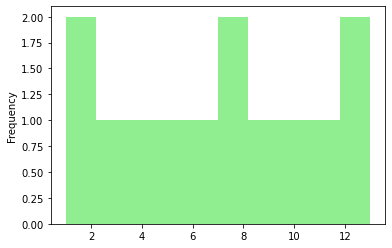

In [48]:
# Check the distribution of the age column
df['age_level'].plot(kind='hist',
               color='lightgreen');

In [49]:
pd.crosstab(df['age_level'], df['Target'])

Target,0.0,1.0,HeartDiseaseorAttack
age_level,,,
1.0,0,0,1
2.0,1,0,0
3.0,1,0,0
4.0,1,0,0
5.0,1,0,0
6.0,1,0,0
7.0,1,0,0
8.0,1,0,0
9.0,1,0,0


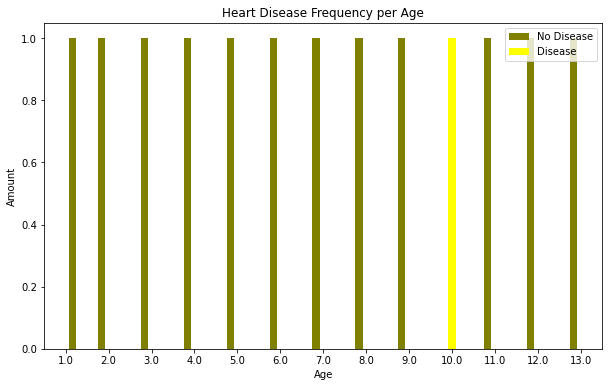

In [51]:
pd.crosstab(df['age_level'], df['Target']).plot(kind='bar',
                                         figsize=(10,6),
                                         color=['olive', 'yellow'])

plt.title("Heart Disease Frequency per Age")
plt.xlabel("Age")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);